In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
x03 = np.load('scenes_allbands/x03.npy')[3, 2, 1]
x04 = np.load('scenes_allbands/x04.npy')[3, 2, 1]
slic_x03 = np.load('slics/slic_x03-pca.npy')
slic_x04 = np.load('slics/slic_x04-pca.npy')
gt_x03 = np.load('truth_masks/truth_x03.npy')
gt_x04 = np.load('truth_masks/truth_x04.npy')
gt_x03 = np.where(gt_x03 == 2, 0, 1)
gt_x04 = np.where(gt_x04 == 2, 0, 1)

In [63]:
np.unique(slic_x03)

array([   1,    2,    3, ..., 6312, 6313, 6314])

In [57]:
np.unique(gt_x03)

array([0, 1])

In [58]:
def get_major_class(seg):
    return np.argmax(np.bincount(seg.flatten()))

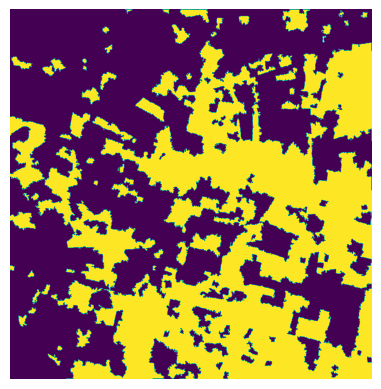

In [59]:
# Create SLIC GT for x03
gt_slic_x03 = np.zeros(gt_x03.shape)
for i in np.unique(slic_x03):
    gt_slic_x03[slic_x03 == i] = get_major_class(gt_x03[slic_x03 == i])
# gt_slic_x03 = np.bitwise_not(np.uint8(gt_slic_x03))
plt.imshow(gt_slic_x03)
plt.axis('off')
# plt.title('SLIC GT for x03')
# Save image
plt.savefig('slic_gt_x03.png', bbox_inches='tight', pad_inches=0)

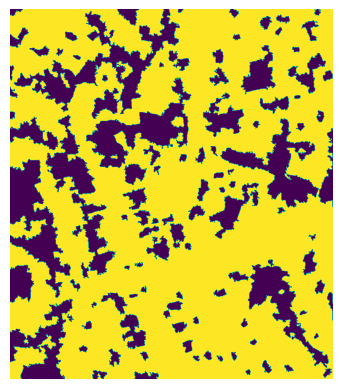

In [60]:
# Create SLIC GT for x04
gt_slic_x04 = np.zeros(gt_x04.shape)
for i in np.unique(slic_x04):
    gt_slic_x04[slic_x04 == i] = get_major_class(gt_x04[slic_x04 == i])
# gt_slic_x04 = np.bitwise_not(np.uint8(gt_slic_x04))
plt.imshow(gt_slic_x04)
plt.axis('off')
# plt.title('SLIC GT for x04')
# Save image
plt.savefig('slic_gt_x04.png', bbox_inches='tight', pad_inches=0)

In [64]:
# Create custom colormap
from matplotlib.colors import ListedColormap
colors = ['black', 'lime']
blackgreen_cmap = ListedColormap(colors)

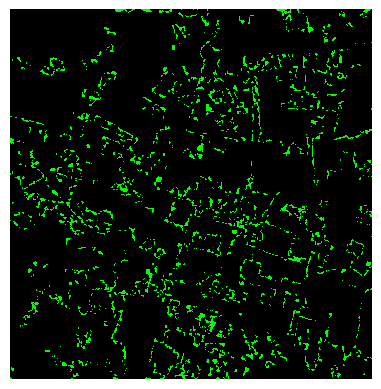

In [65]:
# Calculate diff for x03
diff_x03 = np.where(gt_slic_x03 != gt_x03, 1, 0)
plt.imshow(diff_x03, cmap=blackgreen_cmap)
# plt.title('Diff for x03')
plt.axis('off')
# Save image
plt.savefig('diff_x03.png', bbox_inches='tight', pad_inches=0)

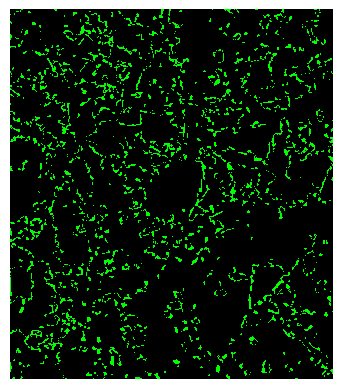

In [66]:
# Calculate diff for x04
diff_x04 = np.where(gt_slic_x04 != gt_x04, 1, 0)
plt.imshow(diff_x04, cmap=blackgreen_cmap)
plt.axis('off')
# plt.title('Diff for x04')
# Save image
plt.savefig('diff_x04.png', bbox_inches='tight', pad_inches=0)

In [33]:
x03 = np.load('scenes_allbands/x03.npy')[[3, 2, 1], :, :]
x03 = x03.transpose(1, 2, 0)
x03.shape

(998, 977, 3)

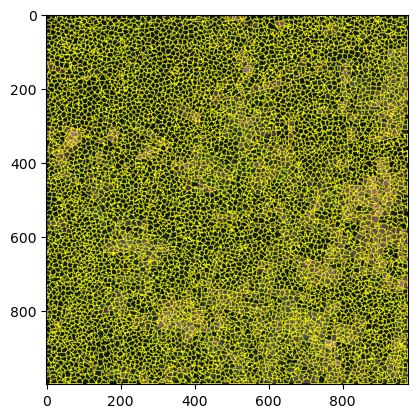

In [34]:
from skimage.segmentation import mark_boundaries
marked_x03 = mark_boundaries(x03, slic_x03)
plt.imshow(marked_x03)